# <font color = #003399> **Instrument recognition** </font>


## <font color = "purple"> **Initialize** </font>


### <font color = "green"> **Import packages** </font>

In [1]:
import os       # For path-manipulations etc

import librosa  # For all kinds of audio manipulations
from librosa import display

from IPython.display import Audio #to play audio inside the notebook

import numpy as np
import scipy
import matplotlib.pyplot as plt

### <font color = "green"> **Mount google drive** </font>

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFy9wLFgt0ByuOeO-G0RZhYwG1clDt-eTX5DmRXlwQWKdTZxqmF_mQ
Mounted at /content/drive


## <font color="purple"> **Import data** </font>

In [3]:
def import_data(data_dir, ins_annotations, max_songs_per_annotation = None):
  """
  Imports the data.

  Parameters
  ----------

  data_dir : string
    Path of the directory that contains the data. It is assumed that 
    this directory contains subdirectories, whose titles are given by
    the annotations of the various instruments. The actual sound-files 
    are inside these subfolders.

  ins_annotations : array of strings
    List of the annotations of the various annotations - these strings 
    also the names of the subfolders that contain the data with that 
    annotation.

  max_songs_per_annotations : int, optional
    Maximum number of songs to include per annotation. Useful to test my code
    while working only a smaller dataset.

  Returns
  -------

  sampling_rates : np.array of ints
    List of the sample-rates (in Hz) of all the music-files

  data : list of np.arrays
    List of time-domain data (in np.array format) of all music snippets.

  classifications : np.array of strings
    List of the annotation for every song - the annotation is for
    the predominant instrument.

  """

  # Initalize the to-be-returned np.arrays
  sampling_rates = [] #note: I'm choosing this to be a list, not a np.arrary.
                    #The reaons is not very good -  but it seems easier to 
                    # append integers to a list. 
                    # If I were to intiialize sampling_rates as a np.array, 
                    # every entry of sampling_rates is automatically treated
                    # as float64..
  data = [] # note: its type is list, not np.array, because the data-signals 
            # it contains may - in principle - be of different length
  classifications = np.array([])

  # Import
  for annotation in ins_annotations:

    print(f"Importing data with annotation '{annotation}'")
    data_subdir = os.path.join(data_dir,annotation)

    for filename in os.listdir(data_subdir)[:max_songs_per_annotation]:

      dt, sr = librosa.load( os.path.join(data_subdir,filename), sr = None, mono = False )

      data.append(dt)
      sampling_rates.append( int(sr) )
      classifications = np.append(classifications,annotation)

  return sampling_rates, data, classifications

In [4]:
# Set working directory for this project
base_dir = '/content/drive/My Drive/Colab Notebooks/instrument_recognition'
os.chdir(base_dir)

# Data directory:
data_dir = os.path.join(base_dir,'data','IRMAS','trainingdata')
# List of the strings used as instrument annotations
ins_annotations = ['cel','cla','flu','gac','gel','org','pia','sax','tru','vio','voi']

#Import data
sampling_rates, data, classifications = import_data(data_dir, ins_annotations, max_songs_per_annotation = 5)

Importing data with annotation 'cel'
Importing data with annotation 'cla'
Importing data with annotation 'flu'
Importing data with annotation 'gac'
Importing data with annotation 'gel'
Importing data with annotation 'org'
Importing data with annotation 'pia'
Importing data with annotation 'sax'
Importing data with annotation 'tru'
Importing data with annotation 'vio'
Importing data with annotation 'voi'


## <font color="purple"> **Preprocessing** </font>

### <font color = "green"> **Playing around with data representations** </font>


#### <font color = "CC3300"> **Time-signal of a single snippet** </font>

In [5]:
# As an example, let's hear & plot the time-signal of the snippet 'i'.
i = 13

## First, let's hear it!
Audio(data[i],rate = sampling_rates[i])

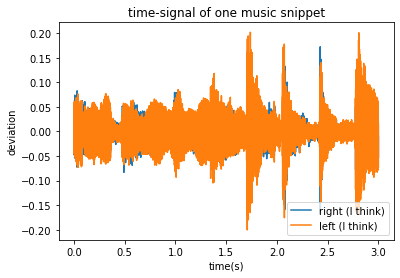

In [6]:
## Second, let's plot it!

timerange = np.arange(0,len(data[i][0])) / float( sampling_rates[i] )

plt.figure()
plt.plot(timerange, data[i][1])
plt.plot(timerange, data[i][0])
plt.title('time-signal of one music snippet')
plt.xlabel('time(s)')
plt.ylabel('deviation')
plt.legend(['right (I think)','left (I think)'],loc='lower right')

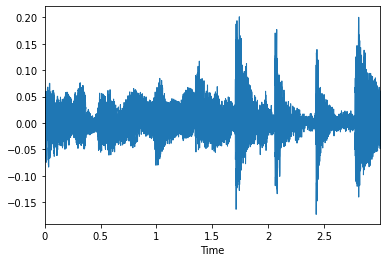

In [7]:
# An alternative way of plotting is with a function that comes with librosa:
librosa.display.waveplot(data[i], sr = sampling_rates[i])
# It seems that this displays the stereo-signal by plotting the left signal above
# the y=0-line, and the right signal below it. In other words, it plots both
# |left signal| and -|right signal| in the same color.

#### <font color = "CC3300"> **Fourier  Transform** </font>

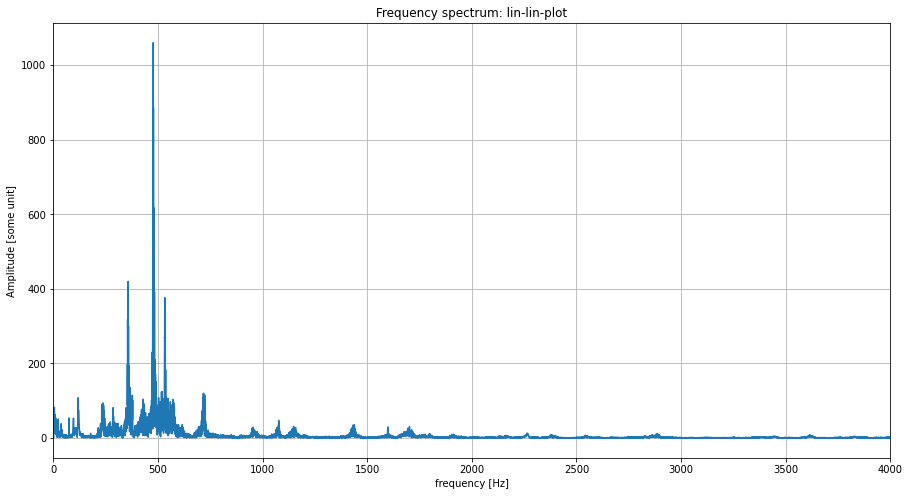

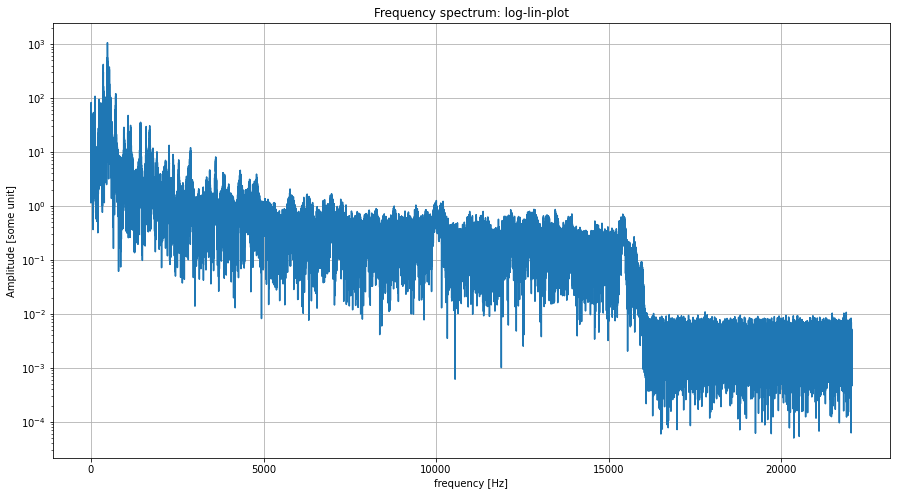

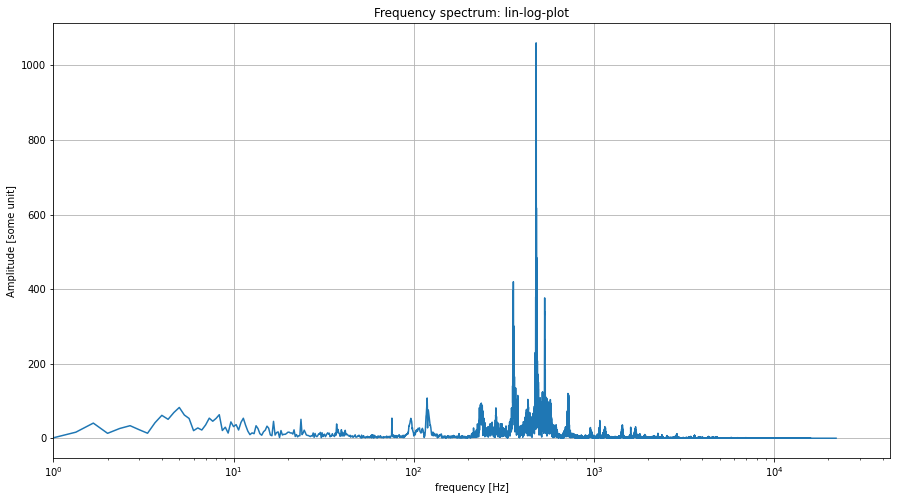

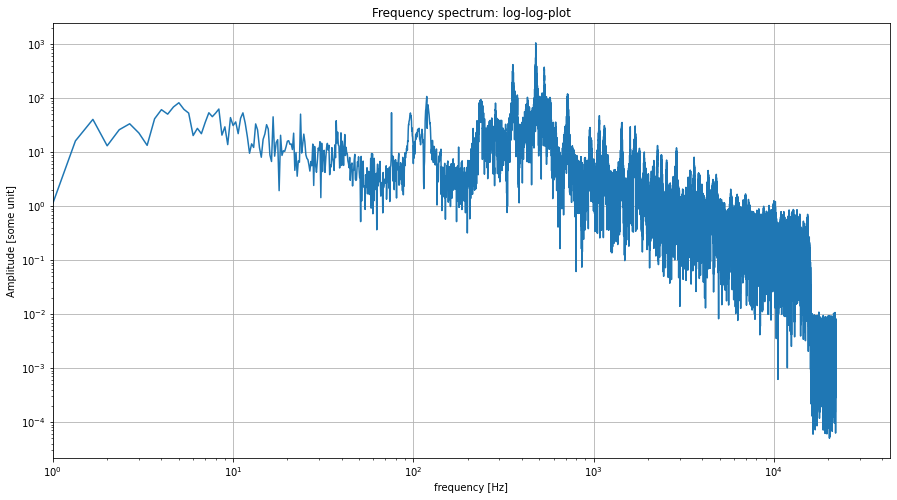

In [8]:
# Let's make some plots of the 'standard' (discrete) Fouriertransform 
# of an entire snippet
exampledata = data[i]
fft = scipy.fft.fft(exampledata)

N = len(exampledata[0])
Nhalf_min  = int(np.floor(N/2))
sr = sampling_rates[i]
T = N/sr # Total time of signal

xf = np.linspace(0, sr * (Nhalf_min-1)/N, Nhalf_min )
yf = np.abs(fft[:,:Nhalf_min])

#I'm only plotting the left-part of the audio, onlyf or clarity. 
# Right part looks pretty similar.

# lin-lin plot:
plt.figure(figsize=(15,8))
plt.plot(xf,yf[0])
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitude [some unit]')
plt.title('Frequency spectrum: lin-lin-plot')
plt.grid(True)
plt.xlim((0,4000))

# log-lin plot:
plt.figure(figsize=(15,8))
plt.plot(xf,yf[0])
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitude [some unit]')
plt.title('Frequency spectrum: log-lin-plot')
plt.grid(True)
plt.yscale('log')

# lin-log plot:
plt.figure(figsize=(15,8))
plt.plot(xf,yf[0])
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitude [some unit]')
plt.title('Frequency spectrum: lin-log-plot')
plt.grid(True)
plt.xlim((1,sr))
plt.xscale('log')

# log-log plot:
plt.figure(figsize=(15,8))
plt.plot(xf,yf[0])
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitude [some unit]')
plt.title('Frequency spectrum: log-log-plot')
plt.grid(True)
plt.xlim((1,sr))
plt.xscale('log')
plt.yscale('log')

#### <font color = "CC3300"> **Spectogram** </font>

In [9]:
time_interval = 0.025 # length (in time) of a window
n_fft = int(np.ceil(sr*time_interval)) 
spec = np.abs( librosa.core.stft(exampledata[0], n_fft = n_fft))
spec_db = librosa.amplitude_to_db(spec, ref = np.max(spec))

Text(0.5, 1.0, 'Spectogram of snippet 13')

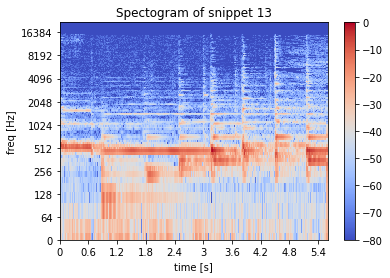

In [10]:
plt.figure()
librosa.display.specshow(spec_db,sr=sr, x_axis = 'time',y_axis = 'log', cmap = 'coolwarm')
plt.colorbar()
plt.xlabel('time [s]')
plt.ylabel('freq [Hz]')
plt.title(f'Spectogram of snippet {i}')

#### <font color = "CC3300"> **Chromagram** </font>

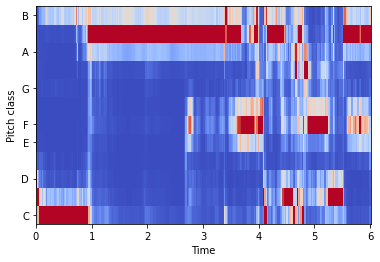

In [11]:
chromagram = librosa.feature.chroma_stft( y = exampledata[0], sr = sr)
plt.figure()
librosa.display.specshow(chromagram, x_axis = 'time', y_axis = 'chroma', cmap = 'coolwarm')

#### <font color = "CC3300"> **Mel-Hz conversion** </font>

Text(0, 0.5, 'Mel')

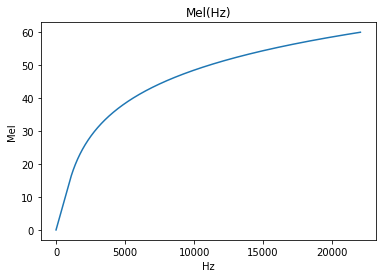

In [12]:
xf_mel = librosa.hz_to_mel(xf)
plt.figure()
plt.plot(xf,xf_mel)
plt.title('Mel(Hz)')
plt.xlabel('Hz')
plt.ylabel('Mel')

#### <font color = "CC3300"> **short-time MFCC's** </font>

In [13]:
time_interval = 0.025 # length (in time) of a window
n_fft = int(np.ceil(sr*time_interval)) 
hop_length = int(np.floor(n_fft/2))

mfccs = librosa.feature.mfcc(exampledata[0], sr = sr, n_fft = n_fft, hop_length = hop_length)

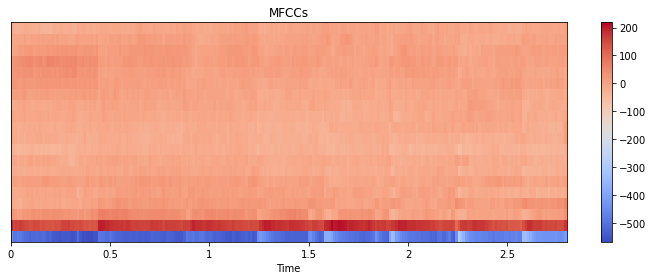

In [14]:
#The following plot doesn't tell you much - but serves only to get an idea of what a MFCC is

plt.figure(figsize = (10,4))
librosa.display.specshow(mfccs, sr = sr, x_axis = 'time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()

#### <font color = "CC3300"> **time-window-averaged MFCC's** </font>

To obtain a number of features that is not so large, we can simply average every coefficient over all time-windows.

In [15]:
features = np.mean(mfccs, axis=1)
features.shape

(20,)

### <font color = "green"> **Now let's be serious: prepare input-data for machine-learning** </font>


### <font color = "CC3300"> **Prepare 'X': time-averaged mfccs** </font>

In [16]:
def obtain_average_mfccs(data, sampling_rates, window_time, time_step = None, n_mfcc = 20):
  """
  Obtains, for every time-profile in 'data', the MFCC's (averaged over all time-windows) 

  Parameters
  ----------

  data : list of m np.arrays of shape 2 x something
    Here m is the number of snippets. Every entry of data contains the time-series of a single music snippet, 
    which is assumed to be stereo.

  sampling_rates : list of m ints
    Every int is the sample rate of the corresponding entry in data.

  window_time : float
    Length in seconds of a window to be used in the short-time Fourier transform,
    that is part of the mfcc-routine.

  time_step : float, optional
    Length in seconds of the time step between two successive windows.
    If not provided, it is set to window_time/2.

  n_mfcc : int
    Number of to-be-returned mel-frequency cepstral coefficients per snippet.

  Returns
  -------

  average_mfccs : np.array of shape m x 2 x n_mfcc
    Every entry of this list corresponds to one entry of data, and contains 
    the mfcc's averaged of the left- and right-component of the stereo signal.
  """

  # If time_step is not defined, give it a standard value:
  if time_step == None:
    time_step = window_time / 2
    print(f'The time-step is not specifed and therefore set to the standard value window_time/2 = {time_step}')

  # Define useful variable:
  m = len(data)

  # Initialize the to-be-returned np.array of average mfccs
  average_mfccs = np.zeros((m,2,n_mfcc))

  # Loop over data samples (snippets), 
  # and calculate the average mfcc's for every sample
  for i in range(m):
    # Parameters for dividing total time sample into windows:
    ## Length of a window
    n_fft = int(np.ceil(sampling_rates[i]*time_interval)) 
    ## Hop length between two successive windows
    hop_length = int(np.ceil(sampling_rates[i]*time_step))

    # Calculate the mffc for the left- and right-audio
    mfccs_left = librosa.feature.mfcc(data[i][0], sr = sampling_rates[i], n_fft = n_fft, hop_length = hop_length)
    mfccs_right = librosa.feature.mfcc(data[i][1], sr = sampling_rates[i], n_fft = n_fft, hop_length = hop_length)

    # Average mfccs over all time-windows,
    # and store result in average_mfccs:
    average_mfccs[i,0] = np.mean(mfccs_left,axis=1)
    average_mfccs[i,1] = np.mean(mfccs_right,axis=1)

  return average_mfccs


In [ ]:
average_mfccs = obtain_average_mfccs(data, sampling_rates, window_time = 0.030)

In [22]:
# To obtain we X, we still need to unroll 
# the left- and right-parts of the stereo-signal:

## Current shape:
print(f'Shape of "average_mfccs": {average_mfccs.shape}')
## Unroll left- and right-parts of the stereo-signal:
X = np.reshape(average_mfccs,(55,40))
## New shape:
print(f'Shape of "X": {X.shape}')

Shape of "average_mfccs": (55, 2, 20)
Shape of "X": (55, 40)


### <font color = "#CC3300"> **Prepare 'y'** </font>

In [47]:
# Note, it's not even necessary to convert the classifications-string into numbers,
# we can just keep:
y = classifications

# Represent classifications as numbers, and store in y:
#classnumber = {'cel': 0, 'cla': 1, 'flu': 2, 'gac': 3,\
#               'gel': 4, 'org': 5, 'pia': 6, 'sax': 7,\
#               'tru': 8, 'vio': 9, 'voi': 10}

#y = np.array([classnumber[cf] for cf in classifications])

### <font color = "#CC3300"> **Split data into training-, cross-validation- and testingsets** </font>

NB: I'm using the IRMAS 'trainingdataset' as my **entire** dataset - which I will split into training, cross-validation and testingsets. This is the simplest thing to do right now. They also provide 'trainingdata', but it's of a different format than their trainingdata (longer snippets etc). It's interesting to test a trained classifier on that too - but a bit more complicated. For now, let's do the simplest thing possible.

In [132]:
# Before splitting, we shuffle X & y:
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(X,y)

# Now, we split

## total number of data samples

m = len(X_shuffled)

## Define the fractions of the data to be used
## for training, and cross-validation (CV); 
## the remainder will be the testing fraction:

fraction_train = 0.6
fraction_CV    = 0.2

## Number of samples for training, CV and testing:
m_train = int( np.ceil( fraction_train * m ) )
m_CV    = int( np.ceil( fraction_CV * m  ) )
m_test  = m - m_train - m_CV

## Split

X_train = X_shuffled[:m_train]
X_CV    = X_shuffled[m_train:(m_train+m_CV)]
X_test  = X_shuffled[-m_test:]

y_train = y_shuffled[:m_train]
y_CV    = y_shuffled[m_train:(m_train+m_CV)]
y_test  = y_shuffled[-m_test:]


### <font color = "#CC3300"> **Feature scaling** </font>

In [18]:
def standardize(X, axis = None):
  """
  `Standardizes' the elements of a 2D array: 
  To every entry we substract the mean of its column
  and divide by the standard-deviation of its column.

  Parameters
  ----------

  X : np.array of shape (m,n) for ints m, n
    To-be-standardized array

  Returns
  -------
  X_std : np.array of shape (m,n)
    Standardized array
  """

  # Compute mean and standarddeviation for every column:
  mu = np.mean(X, axis = 0)
  sigma = np.std(X, axis = 0)

  # For every element of array: 
  # substract mean and divide by standarddeviation
  X_std = (X - mu)/sigma
  ## Note that the shapes of array, mu and sigma do not match,
  ## but the broadcasting property of the python operations '-'
  ## and '/' ensures that it works as it should.

  return X_std

In [133]:
# Standarddize all features

X_train_std = standardize(X_train)
X_CV_std = standardize(X_CV)
X_test_std = standardize(X_test)

## <font color = "purple"> **Train a classifier** </font>

Let's try to a few different classifiers with different algorithms, and compare them. Let's start as simple as possible.



### <font color = "green"> **Simple logistic regression** </font>

In [134]:
from sklearn.linear_model import LogisticRegression

In [180]:
def evaluate_performance_LR(X_train_std, y_train, X_CV_std, y_CV, C):
  '''
  Trains a Logistic-Regression-Classifier on a trainingset, 
  and returns its accuracy on the trainingset, as well as on a separate set
  (cross-validation or test-set)

  Parameters
  ----------

  X_train_std : np.array of shape (m_train,n_train)
    Training data of m_train training samples and n_train standardized features.

  y_train : np.array of shape (m_train,)
    Labels of training set

  X_CV_std : np.array of shape (m_CV,n_CV)
    Cross-validation or testing data of m_CV training samples
    and n_CV standardized features.

  y_CV : np.array of shape (m_CV,)
    Labels of cross-valdation or test set.

  C : float64 
    inverse regularization parameter

  Returns
  -------

  score_train : float 64 (where 0 <= score_train <=1 )
    Accuracy of the trained logistic-regression-model on the training set.

  score_CV : float 64 (where 0 <= score_CV <=1 )
    Accuracy of the trained logistic-regression-model 
    on the cross-validation/test set.
  '''

  # Initalize Logistic Regression model
  logisticRegr = LogisticRegression(C = C)

  # Train it
  logisticRegr.fit(X_train_std, y_train)

  # Evaluate accuracies
  score_train = logisticRegr.score(X_train_std, y_train)
  score_CV    = logisticRegr.score(X_CV_std   , y_CV)

  return score_train,score_CV

In [187]:
Clist = [1,2,3,4,5]

[ evaluate_performance_LR(X_train_std, y_train, X_CV_std, y_CV, C) for C in Clist ]

[(1.0, 0.45454545454545453),
 (1.0, 0.45454545454545453),
 (1.0, 0.5454545454545454),
 (1.0, 0.5454545454545454),
 (1.0, 0.5454545454545454)]

In [174]:
  # Initalize Logistic Regression model
  logisticRegr = LogisticRegression(C = 0.1)

  # Train it
  logisticRegr.fit(X_train_std,y_train)

  # Evaluate accuracies
  #score_train = logisticRegr.score(X_train_std,y_train)
  #score_CV    = logisticRegr.score(X_CV_std   ,y_CV)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)